In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import OneHotEncoder
import numpy as np
data = load_iris() # 이게 word2vec이라고 가정할게. 우리꺼로 따지면 word는 '한석원' vec은 word2vec을통해 구한 벡터값
word,vecs = [data.target_names[x] for x in data.target ],data.data  # 우리는 word2vec을 넣어야겠지?

for i in range(len(word)):
    word[i]+=str(i)

enc = OneHotEncoder()
n_cluster = 20
inertia_list = []


In [2]:
for i in range(3,n_cluster):

    km = KMeans(n_clusters=i)

    km.fit(vecs)
    
    inertia_list.append(km.inertia_)

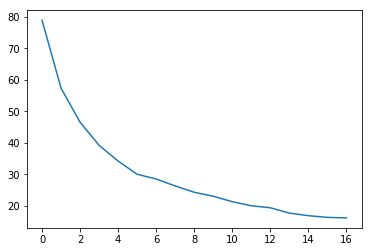

In [3]:
plt.plot(inertia_list)
plt.show() # 여기서 5처럼 갑자기 경사가 낮아지는곳 정하기

In [4]:
#만약에 5라면 아래를 통해 어디 클러스터에 속하는지 알수 있다.
final_cluster = 5
km = KMeans(n_clusters=final_cluster)
pred = km.fit_predict(vecs)
for i,j in zip(word,pred):
    print(i,j)

setosa0 0
setosa1 0
setosa2 0
setosa3 0
setosa4 0
setosa5 0
setosa6 0
setosa7 0
setosa8 0
setosa9 0
setosa10 0
setosa11 0
setosa12 0
setosa13 0
setosa14 0
setosa15 0
setosa16 0
setosa17 0
setosa18 0
setosa19 0
setosa20 0
setosa21 0
setosa22 0
setosa23 0
setosa24 0
setosa25 0
setosa26 0
setosa27 0
setosa28 0
setosa29 0
setosa30 0
setosa31 0
setosa32 0
setosa33 0
setosa34 0
setosa35 0
setosa36 0
setosa37 0
setosa38 0
setosa39 0
setosa40 0
setosa41 0
setosa42 0
setosa43 0
setosa44 0
setosa45 0
setosa46 0
setosa47 0
setosa48 0
setosa49 0
versicolor50 1
versicolor51 1
versicolor52 1
versicolor53 4
versicolor54 1
versicolor55 1
versicolor56 1
versicolor57 4
versicolor58 1
versicolor59 4
versicolor60 4
versicolor61 1
versicolor62 4
versicolor63 1
versicolor64 4
versicolor65 1
versicolor66 1
versicolor67 4
versicolor68 1
versicolor69 4
versicolor70 1
versicolor71 4
versicolor72 1
versicolor73 1
versicolor74 1
versicolor75 1
versicolor76 1
versicolor77 1
versicolor78 1
versicolor79 4
versicolor

In [5]:
tmp_sentences = [['setosa4','virginica141'],
                ['virginica126','virginica120']]

In [6]:
res_sentences = []
for tmp_sentence in tmp_sentences:
    tmp_list=[]
    for i in tmp_sentence:
        tmp_list.append(pred[word.index(i)])
#     print(tmp_list)
    res_sentences.append(np.bincount(tmp_list,minlength=final_cluster))
np.array(res_sentences)

array([[1, 0, 0, 1, 0],
       [0, 1, 0, 1, 0]], dtype=int64)

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from torch.utils.data.dataset import Dataset
from torch.utils.data import DataLoader

In [8]:
X = np.array(res_sentences)
y = np.ones(len(X)) # 우리가 아직 라벨링을 안했으니까 임시로
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

batchSize=1
learningRate = 0.01
epochNum = 10
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [87]:
class Mydataset(Dataset):
    
    def __init__(self,train_or_test="train"):
        if train_or_test == "train":
            self.X=X_train
            self.y=y_train
        elif train_or_test == "test":
            self.X=X_test
            self.y=y_test
        else:
            self.X=X
            self.y=y
    def __getitem__(self,index):
        return torch.from_numpy(X[index]).type(torch.FloatTensor),y[index]
    
    def __len__(self):
        return len(self.y)

In [88]:
train_dataset = Mydataset('train')
train_loader = DataLoader(train_dataset,batch_size=batchSize,shuffle=True)

test_dataset = Mydataset('test')
test_loader = DataLoader(test_dataset,batch_size=batchSize,shuffle=True)

tmp_dataset=Mydataset('tmp')
tmp_loader=DataLoader(tmp_dataset,batch_size=2,shuffle=True)

In [89]:
class Mynet(nn.Module):
    
    def __init__(self):
        super(Mynet, self).__init__()
        
        #self.hidden1 = nn.Linear(final_cluster,10)
        self.output = nn.Linear(5,1)
    
    def forward(self, x):
#         z = self.hidden1(x)
#         z = nn.Sigmoid(z)
        z = self.output(x)
        
        return z
        

In [95]:
model = Mynet()
model.train()                                                          
costFunction = nn.BCELoss()                                   
optimizer = torch.optim.Adam(model.parameters(), lr = learningRate)    

totalStep = len(train_loader)

In [100]:
from torch.autograd import Variable

for epoch in range(epochNum):
    print('epoch: ',epoch)
    for idx, (sen_bins, labels) in enumerate(tmp_loader):
        
        tmp_X = Variable(sen_bins)
        tmp_y = labels
        
        #labels = labels.view(-1,1)
        # Forward pass
        print('before outputs')
        outputs = model(tmp_X)    
        loss = costFunction(outputs, tmp_y.float()) 
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (idx + 1) % 100 == 0:
            
            print("Epoch [{}/{}], Step [{}/{}] Loss: {:.4f}".format(epoch + 1, epochNum, idx + 1, totalStep, loss.item()))

epoch:  0
before outputs
epoch:  1
before outputs
epoch:  2
before outputs
epoch:  3
before outputs
epoch:  4
before outputs
epoch:  5
before outputs
epoch:  6
before outputs
epoch:  7
before outputs
epoch:  8
before outputs
epoch:  9
before outputs


C:\Users\jyh54\Anaconda3\lib\site-packages\torch\nn\functional.py:1594: UserWarning: Using a target size (torch.Size([2])) that is different to the input size (torch.Size([2, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))


In [ ]:
print("hi")